In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv("data/Train.csv")
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [3]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [4]:
train.iloc[3173]

Order No                                     Order_No_27041
User Id                                         User_Id_246
Vehicle Type                                           Bike
Platform Type                                             3
Personal or Business                               Business
Placement - Day of Month                                 25
Placement - Weekday (Mo = 1)                              2
Placement - Time                                 5:47:00 PM
Confirmation - Day of Month                              25
Confirmation - Weekday (Mo = 1)                           2
Confirmation - Time                              5:46:34 PM
Arrival at Pickup - Day of Month                         25
Arrival at Pickup - Weekday (Mo = 1)                      2
Arrival at Pickup - Time                         5:47:02 PM
Pickup - Day of Month                                    25
Pickup - Weekday (Mo = 1)                                 2
Pickup - Time                           

In [5]:
variable = pd.read_csv("data/VariableDefinitions.csv")
variable

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [6]:
# Renaming columns
train.rename(columns={
    "Order No": "order_id",
    "User Id": "user_id",
    "Vehicle Type": "vehicle",
    "Platform Type": "platform",
    "Personal or Business": "personal_or_business",
    "Placement - Day of Month": "placement_date",
    "Placement - Weekday (Mo = 1)": "placement_weekday",
    "Placement - Time": "placement_time",
    "Confirmation - Day of Month": "confirm_date",
    "Confirmation - Weekday (Mo = 1)": "confirm_weekday",
    "Confirmation - Time": "confirm_time",
    "Arrival at Pickup - Day of Month": "arrival_pickup_date",
    "Arrival at Pickup - Weekday (Mo = 1)": "arrive_pickup_weekday",
    "Arrival at Pickup - Time": "arrive_time",
    "Pickup - Day of Month": "pickup_date",
    "Pickup - Weekday (Mo = 1)": "pickup_weekday",
    "Pickup - Time": "pickup_time",
    "Arrival at Destination - Day of Month": "arrival_dest_date",
    "Arrival at Destination - Weekday (Mo = 1)": "arrival_dest_weekday",
    "Arrival at Destination - Time": "arrival_dest_time",
    "Distance (KM)": "distance",
    "Temperature": "temperature",
    "Precipitation in millimeters": "precipitation",
    "Pickup Lat": "pickup_lat",
    "Pickup Long": "pickup_long",
    "Destination Lat": "dest_lat",
    "Destination Long": "dest_long",
    "Rider Id": "rider_id",
    "Time from Pickup to Arrival": "pickup_to_arrival_time"
}, inplace=True)

In [7]:
train[["placement_time", "confirm_time", "arrive_time", "pickup_time", "arrival_dest_time", "pickup_to_arrival_time"]].iloc[30]

placement_time            3:26:29 PM
confirm_time              3:26:50 PM
arrive_time               3:47:49 PM
pickup_time               3:52:11 PM
arrival_dest_time         4:29:12 PM
pickup_to_arrival_time          2221
Name: 30, dtype: object

In [8]:
train[train.placement_weekday != train.arrival_dest_weekday]

,order_id,user_id,vehicle,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,...,arrival_dest_time,distance,temperature,precipitation,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time
4024,Order_No_2800,User_Id_1402,Bike,3,Business,17,1,2:34:37 PM,18,2,...,2:45:52 PM,11,25.6,NaN,-1.225322,36.808550,-1.281754,36.832423,Rider_Id_928,2640
9804,Order_No_3530,User_Id_2457,Bike,3,Business,11,2,12:22:05 PM,13,4,...,2:24:41 PM,8,22.5,NaN,-1.291548,36.829752,-1.255189,36.782203,Rider_Id_247,1854


In [9]:
# Changing personal/business, platform, and vehicle type to categorical
train = train.astype({"vehicle": "category", 
                      "platform": "category", 
                      "personal_or_business": "category"})

In [10]:
# Changing order no., user id, rider_id to int
train["order_id"] = train["order_id"].str.replace("Order_No_", "").astype(int)
train["user_id"] = train["user_id"].str.replace("User_Id_", "").astype(int)
train["rider_id"] = train["rider_id"].str.replace("Rider_Id_", "").astype(int)

<AxesSubplot:>

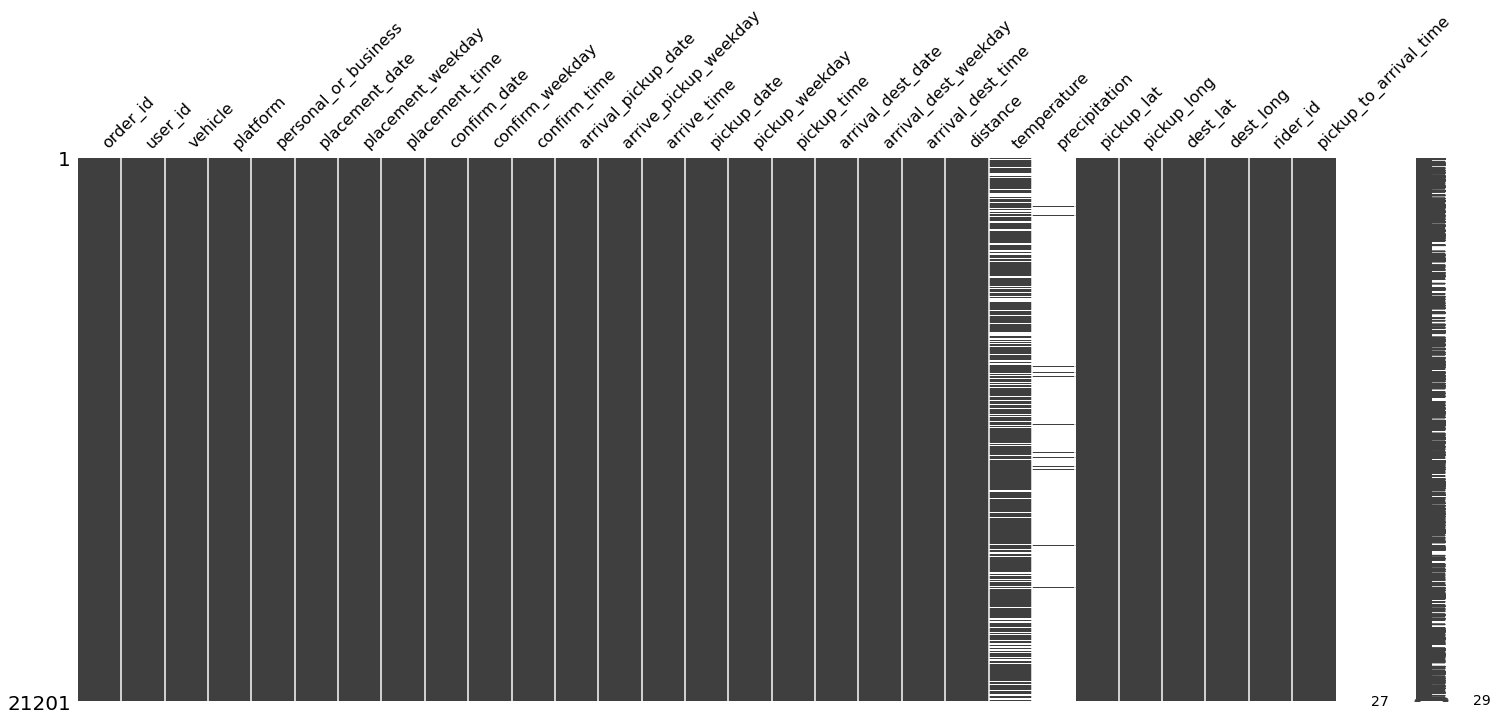

In [11]:
msno.matrix(train)

In [12]:
# Drop precipitation
train.drop(columns="precipitation", inplace=True)

In [13]:
# Drop vehicle because they are all 'Bike'
train.drop(columns="vehicle", inplace=True)

In [14]:
# Fill missing data in temperature with the mean
train.temperature.fillna(train.temperature.mean(), inplace=True)

In [15]:
train.dtypes

order_id                     int64
user_id                      int64
platform                  category
personal_or_business      category
placement_date               int64
placement_weekday            int64
placement_time              object
confirm_date                 int64
confirm_weekday              int64
confirm_time                object
arrival_pickup_date          int64
arrive_pickup_weekday        int64
arrive_time                 object
pickup_date                  int64
pickup_weekday               int64
pickup_time                 object
arrival_dest_date            int64
arrival_dest_weekday         int64
arrival_dest_time           object
distance                     int64
temperature                float64
pickup_lat                 float64
pickup_long                float64
dest_lat                   float64
dest_long                  float64
rider_id                     int64
pickup_to_arrival_time       int64
dtype: object

In [16]:
correl = train.corr()
correl

,order_id,user_id,placement_date,placement_weekday,confirm_date,confirm_weekday,arrival_pickup_date,arrive_pickup_weekday,pickup_date,pickup_weekday,arrival_dest_date,arrival_dest_weekday,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time
order_id,1.000000,-0.015921,-0.001698,-0.013336,-0.001719,-0.013456,-0.001719,-0.013456,-0.001719,-0.013456,-0.001719,-0.013456,0.001802,0.003955,-0.012558,0.003814,0.004146,0.000053,-0.004334,-0.013171
user_id,-0.015921,1.000000,-0.016579,0.002528,-0.016576,0.002549,-0.016576,0.002549,-0.016576,0.002549,-0.016576,0.002549,-0.006908,-0.006268,0.121854,-0.046961,0.053308,0.000454,0.008612,0.018138
placement_date,-0.001698,-0.016579,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.011605,-0.004929,-0.005453,0.007541,0.002077,-0.010908,-0.014710
placement_weekday,-0.013336,0.002528,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.027703,-0.000918,0.011008,-0.004299,-0.000875,-0.007403,0.009693
confirm_date,-0.001719,-0.016576,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
confirm_weekday,-0.013456,0.002549,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744
arrival_pickup_date,-0.001719,-0.016576,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
arrive_pickup_weekday,-0.013456,0.002549,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744
pickup_date,-0.001719,-0.016576,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.011606,-0.004923,-0.005448,0.007550,0.002073,-0.010907,-0.014701
pickup_weekday,-0.013456,0.002549,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027712,-0.000883,0.011036,-0.004251,-0.000900,-0.007401,0.009744


In [17]:
# Convert correlation coefficients to categories
def to_str_correl(coeff):
    if coeff <= -0.7:
        return "strong neg"
    elif coeff <= -0.4:
        return "moderate neg"
    elif coeff < 0.4:
        return "weak"
    elif coeff < 0.7:
        return "moderate pos"
    else:
        return "strong pos"
    
correl = correl.applymap(to_str_correl)

In [18]:
# Listing strong correlation variables
for column in correl.columns:
    for index in correl[column].index:
        if (column != index) and ("strong" in correl.loc[index, column]):
            print(column + " & " + index + " : " + correl.loc[index, column])

placement_date & confirm_date : strong pos
placement_date & arrival_pickup_date : strong pos
placement_date & pickup_date : strong pos
placement_date & arrival_dest_date : strong pos
placement_weekday & confirm_weekday : strong pos
placement_weekday & arrive_pickup_weekday : strong pos
placement_weekday & pickup_weekday : strong pos
placement_weekday & arrival_dest_weekday : strong pos
confirm_date & placement_date : strong pos
confirm_date & arrival_pickup_date : strong pos
confirm_date & pickup_date : strong pos
confirm_date & arrival_dest_date : strong pos
confirm_weekday & placement_weekday : strong pos
confirm_weekday & arrive_pickup_weekday : strong pos
confirm_weekday & pickup_weekday : strong pos
confirm_weekday & arrival_dest_weekday : strong pos
arrival_pickup_date & placement_date : strong pos
arrival_pickup_date & confirm_date : strong pos
arrival_pickup_date & pickup_date : strong pos
arrival_pickup_date & arrival_dest_date : strong pos
arrive_pickup_weekday & placement_we

<AxesSubplot:xlabel='platform', ylabel='pickup_to_arrival_time'>

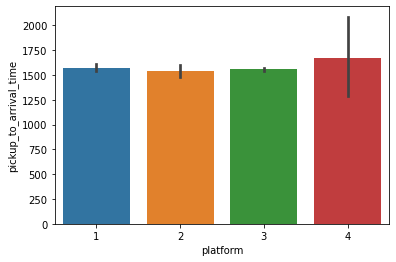

In [19]:
sns.barplot(x="platform", y="pickup_to_arrival_time", data=train)

In [20]:
def convert_time(time):
    #time is in the form "XX:XX:XX AM/PM" or "X:XX:XX AM/PM". Convert it to a seconds format.
    #for example, "1:00:00 AM" is converted to 3600. "1:00:00 PM" is converted to 46800.
    
    time_one_twelve = time[:-3] 
    if time_one_twelve[1] == ":":
        time_one_twelve = "0" + time_one_twelve[:]
    #this is the part consisting of "XX:XX:XX"
    
    ampm = time[-2:] #this is the part consisting of "AM/PM"
    
    if ampm == 'AM':
        return convert_am_time(time_one_twelve)
    elif ampm == 'PM':
        return convert_am_time(time_one_twelve) + 3600 * 12
    else:
        return -1 #this should never happen when your input is valid, it's to deal with naughty inputs

In [21]:
def convert_am_time(time_one_twelve):
    hour_string = time_one_twelve[:2]
    minute_string = time_one_twelve[3:5]
    second_string = time_one_twelve[6:8]
    
    if hour_string == "12":
        hour_int = 0
    else:
        hour_int = convert_str_to_int(hour_string)
    minute_int = convert_str_to_int(minute_string)
    second_int = convert_str_to_int(second_string)
    
    return 3600 * hour_int + 60 * minute_int + second_int

In [22]:
def convert_str_to_int(string):
    # Precondition: string has length 2 and should only consist of digits
    if string[0] == "0":
        return int(string[1])
    return int(string)

In [23]:
train['placement_time'] = train.apply(lambda x: convert_time(x.placement_time), axis=1)
train['confirm_time'] = train.apply(lambda x: convert_time(x.confirm_time), axis=1)
train['pickup_time'] = train.apply(lambda x: convert_time(x.pickup_time), axis=1)
train['arrive_time'] = train.apply(lambda x: convert_time(x.arrive_time), axis=1)
train['arrival_dest_time'] = train.apply(lambda x: convert_time(x.arrival_dest_time), axis=1)

In [24]:
train.dtypes

order_id                     int64
user_id                      int64
platform                  category
personal_or_business      category
placement_date               int64
placement_weekday            int64
placement_time               int64
confirm_date                 int64
confirm_weekday              int64
confirm_time                 int64
arrival_pickup_date          int64
arrive_pickup_weekday        int64
arrive_time                  int64
pickup_date                  int64
pickup_weekday               int64
pickup_time                  int64
arrival_dest_date            int64
arrival_dest_weekday         int64
arrival_dest_time            int64
distance                     int64
temperature                float64
pickup_lat                 float64
pickup_long                float64
dest_lat                   float64
dest_long                  float64
rider_id                     int64
pickup_to_arrival_time       int64
dtype: object

In [25]:
train[['placement_time', 'confirm_time', 'arrive_time', 'pickup_time', 'arrival_dest_time', 'pickup_to_arrival_time']]

,placement_time,confirm_time,arrive_time,pickup_time,arrival_dest_time,pickup_to_arrival_time
0,34546,34810,36287,37650,38395,745
1,40576,41001,42022,42249,44242,1993
2,45565,45764,46174,46383,46838,455
3,33934,33965,34676,34986,36327,1341
4,35718,35778,36233,36323,37537,1214
...,...,...,...,...,...,...
21196,57278,57309,57529,58808,58817,9
21197,36814,36821,37204,38007,38777,770
21198,61576,61629,63017,64252,67205,2953
21199,34299,34313,34739,35115,36495,1380


In [26]:
train

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,arrival_dest_weekday,arrival_dest_time,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,5,38395,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,5,44242,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993
2,1899,265,3,Business,30,2,45565,30,2,45764,...,2,46838,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,5,36327,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,1,37537,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,8834,2001,3,Personal,20,3,57278,20,3,57309,...,3,58817,3,28.600000,-1.258414,36.804800,-1.275285,36.802702,953,9
21197,22892,1796,3,Business,13,6,36814,13,6,36821,...,6,38777,7,26.000000,-1.307143,36.825009,-1.331619,36.847976,155,770
21198,2831,2956,3,Business,7,4,61576,7,4,61629,...,4,67205,20,29.200000,-1.286018,36.897534,-1.258414,36.804800,697,2953
21199,6174,2524,1,Personal,4,3,34299,4,3,34313,...,3,36495,13,15.000000,-1.250030,36.874167,-1.279210,36.794872,347,1380


In [27]:
train['placement_to_confirm_time'] = train.confirm_time - train.placement_time
#first time interval
train['confirm_to_pickup_time'] = train.pickup_time - train.confirm_time
#second time interval
train['pickup_to_arrival_time'] = train.arrival_dest_time - train.pickup_time
#third time interval

In [28]:
train.dtypes

order_id                        int64
user_id                         int64
platform                     category
personal_or_business         category
placement_date                  int64
placement_weekday               int64
placement_time                  int64
confirm_date                    int64
confirm_weekday                 int64
confirm_time                    int64
arrival_pickup_date             int64
arrive_pickup_weekday           int64
arrive_time                     int64
pickup_date                     int64
pickup_weekday                  int64
pickup_time                     int64
arrival_dest_date               int64
arrival_dest_weekday            int64
arrival_dest_time               int64
distance                        int64
temperature                   float64
pickup_lat                    float64
pickup_long                   float64
dest_lat                      float64
dest_long                     float64
rider_id                        int64
pickup_to_ar

In [29]:
train[train.placement_weekday != train.arrival_dest_weekday]

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
4024,2800,1402,3,Business,17,1,52477,18,2,47813,...,11,25.6,-1.225322,36.808550,-1.281754,36.832423,928,2640,-4664,2699
9804,3530,2457,3,Business,11,2,44525,13,4,48450,...,8,22.5,-1.291548,36.829752,-1.255189,36.782203,247,1854,3925,1577


In [30]:
train.iloc[4024]

order_id                          2800
user_id                           1402
platform                             3
personal_or_business          Business
placement_date                      17
placement_weekday                    1
placement_time                   52477
confirm_date                        18
confirm_weekday                      2
confirm_time                     47813
arrival_pickup_date                 18
arrive_pickup_weekday                2
arrive_time                      50385
pickup_date                         18
pickup_weekday                       2
pickup_time                      50512
arrival_dest_date                   18
arrival_dest_weekday                 2
arrival_dest_time                53152
distance                            11
temperature                       25.6
pickup_lat                   -1.225322
pickup_long                   36.80855
dest_lat                     -1.281754
dest_long                    36.832423
rider_id                 

In [31]:
train.iloc[9804]

order_id                          3530
user_id                           2457
platform                             3
personal_or_business          Business
placement_date                      11
placement_weekday                    2
placement_time                   44525
confirm_date                        13
confirm_weekday                      4
confirm_time                     48450
arrival_pickup_date                 13
arrive_pickup_weekday                4
arrive_time                      48758
pickup_date                         13
pickup_weekday                       4
pickup_time                      50027
arrival_dest_date                   13
arrival_dest_weekday                 4
arrival_dest_time                51881
distance                             8
temperature                       22.5
pickup_lat                   -1.291548
pickup_long                  36.829752
dest_lat                     -1.255189
dest_long                    36.782203
rider_id                 

In [32]:
train[train.placement_to_confirm_time < 0]

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
3173,27041,246,3,Business,25,2,64020,25,2,63994,...,3,24.0,-1.258414,36.804800,-1.255189,36.782203,875,352,-26,576
4024,2800,1402,3,Business,17,1,52477,18,2,47813,...,11,25.6,-1.225322,36.808550,-1.281754,36.832423,928,2640,-4664,2699
6805,7504,527,2,Personal,30,4,48513,30,4,48471,...,12,20.6,-1.286177,36.820909,-1.331943,36.894471,45,1456,-42,1313
10597,1271,2078,1,Personal,5,5,37840,5,5,37839,...,10,23.6,-1.233299,36.813070,-1.256730,36.784224,770,1417,-1,855
11083,4442,1411,1,Personal,28,2,34205,28,2,34192,...,3,16.2,-1.308378,36.859008,-1.315920,36.851672,329,499,-13,1279
16331,19517,393,3,Business,20,4,49532,20,4,49520,...,14,28.0,-1.317755,36.830370,-1.306378,36.751984,731,2106,-12,143


In [38]:
train.loc[4024,'placement_to_confirm_time'] = 86400 - 4664
train.loc[9804,'placement_to_confirm_time'] = 86400 * 2 + 3925

In [39]:
train.iloc[9804]

order_id                          3530
user_id                           2457
platform                             3
personal_or_business          Business
placement_date                      11
placement_weekday                    2
placement_time                   44525
confirm_date                        13
confirm_weekday                      4
confirm_time                     48450
arrival_pickup_date                 13
arrive_pickup_weekday                4
arrive_time                      48758
pickup_date                         13
pickup_weekday                       4
pickup_time                      50027
arrival_dest_date                   13
arrival_dest_weekday                 4
arrival_dest_time                51881
distance                             8
temperature                       22.5
pickup_lat                   -1.291548
pickup_long                  36.829752
dest_lat                     -1.255189
dest_long                    36.782203
rider_id                 

In [44]:
train.drop([3173,6805,10597,11083,16331], inplace = True)

In [45]:
train[train.placement_to_confirm_time < 0]

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time


In [46]:
train.to_pickle("clean-data/train.pkl")